<a href="https://colab.research.google.com/github/galitneu/auto-eda-tool/blob/main/%D7%A1%D7%95%D7%A4%D7%99_8799.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from google.colab import drive

# --- שלב 1: הגדרות וטעינת נתונים ---
print("--- שלב 1: טוען נתונים ---")
drive.mount('/content/drive', force_remount=True)
DRIVE_PATH = '/content/drive/MyDrive/KaggleProject/'

try:
    df_train_raw = pd.read_csv(f'{DRIVE_PATH}Train.csv', low_memory=False, parse_dates=['saledate'])
    df_valid_raw = pd.read_csv(f'{DRIVE_PATH}Valid.csv', low_memory=False, parse_dates=['saledate'])
    print("נתונים נטענו בהצלחה.")
except FileNotFoundError:
    print(f"שגיאה: ודא שהקבצים 'Train.csv' ו-'Valid.csv' נמצאים בתיקייה: {DRIVE_PATH}")
    exit()



--- שלב 1: טוען נתונים ---
Mounted at /content/drive
נתונים נטענו בהצלחה.


In [2]:
df_train_raw.info()
df_valid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

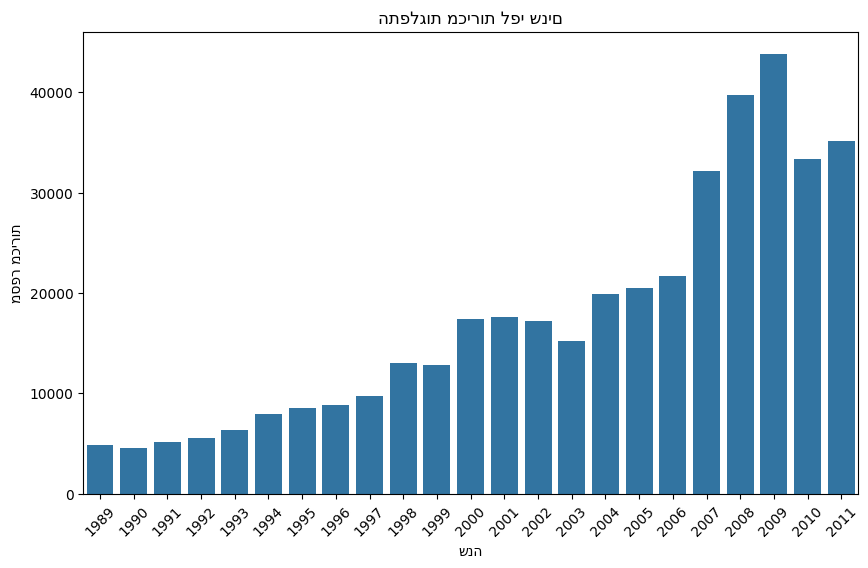

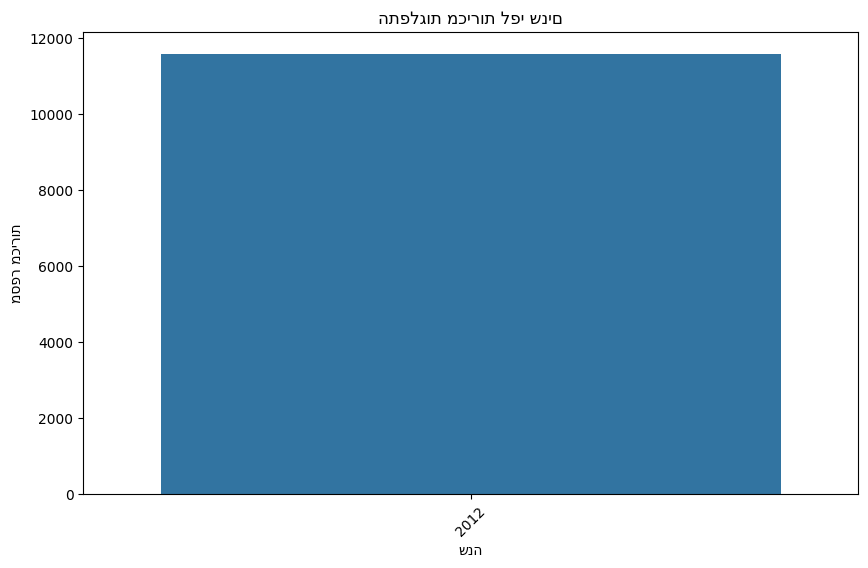

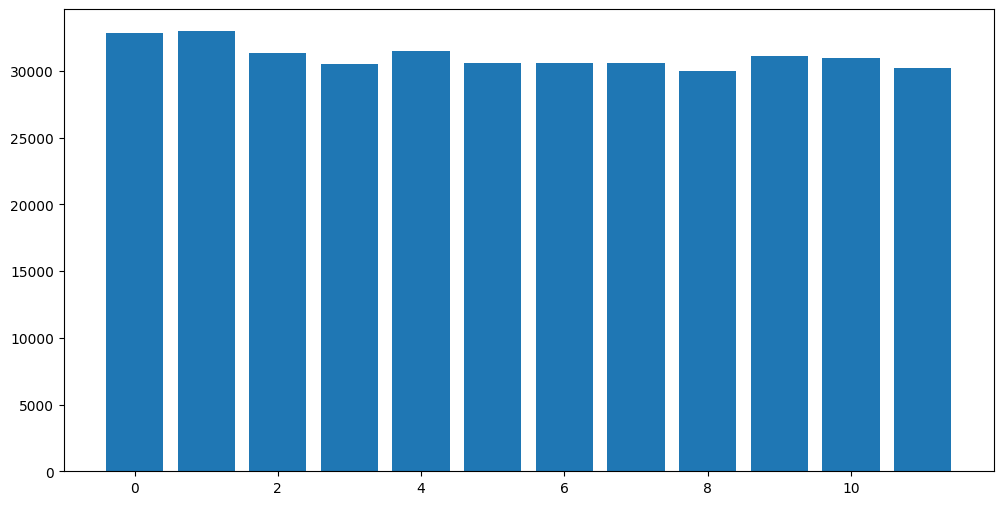

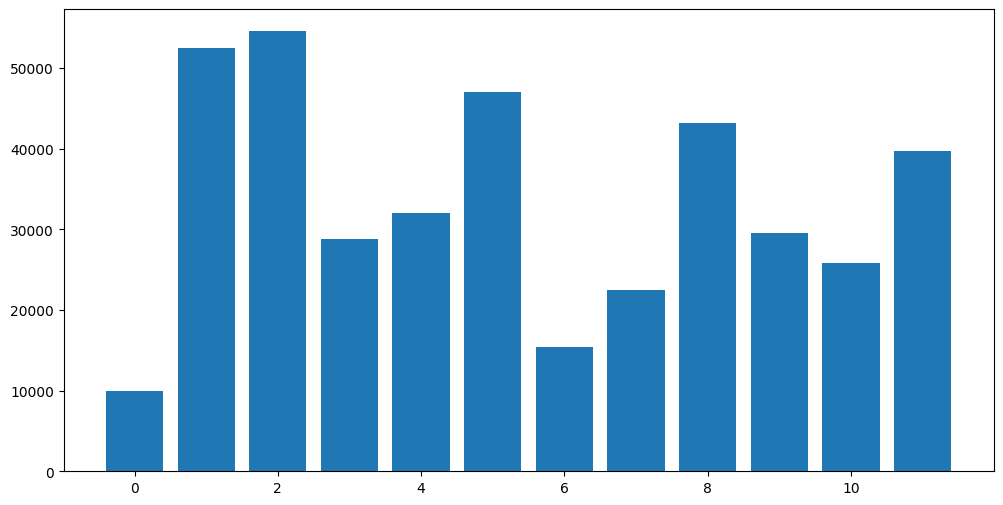

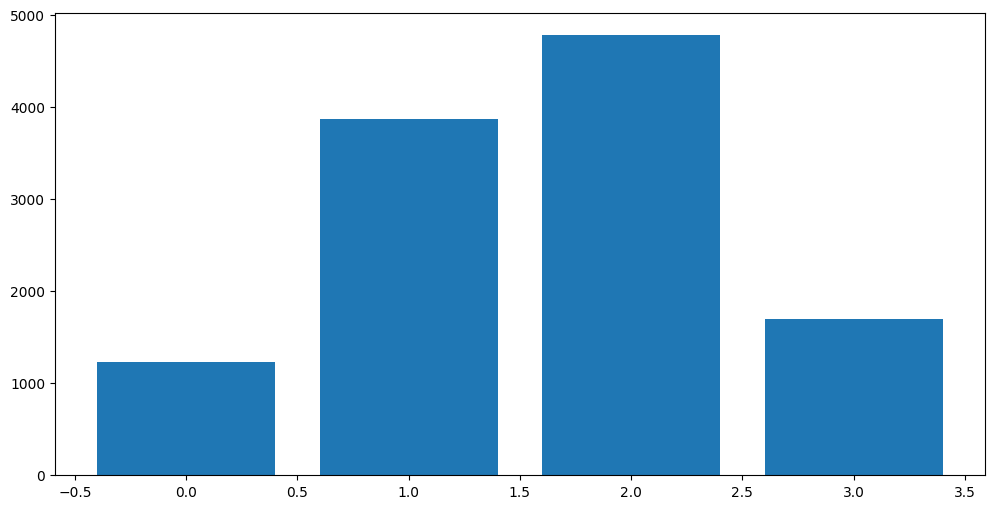

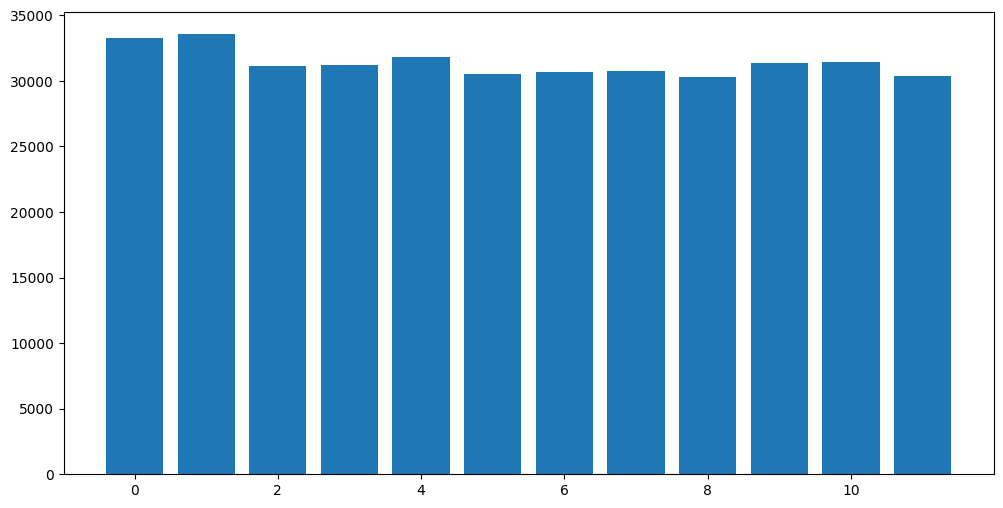

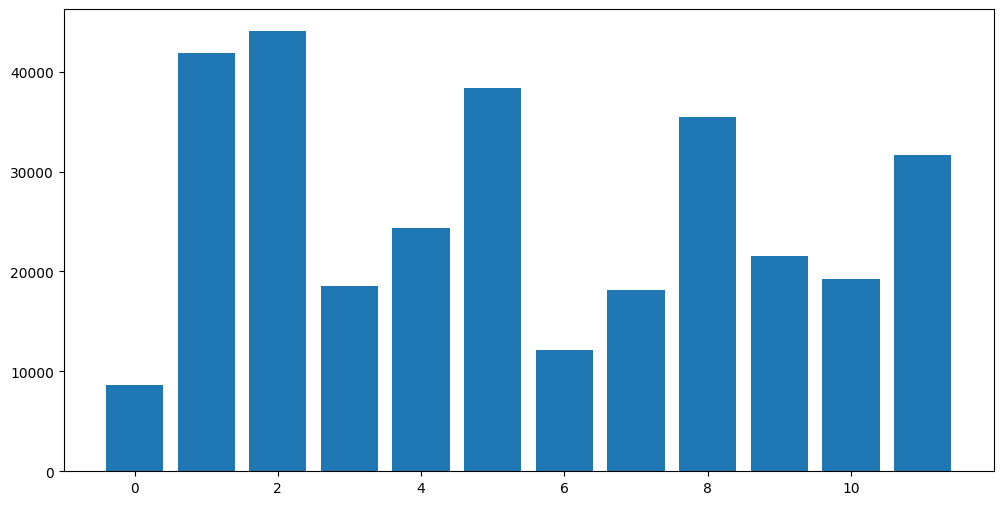

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def sales_year(df):
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x=df['saledate'].dt.year)
  plt.title('התפלגות מכירות לפי שנים')
  plt.xlabel('שנה')
  plt.ylabel('מספר מכירות')
  plt.xticks(rotation=45)
  plt.show()


sales_year(df_train_raw)
sales_year(df_valid_raw)

monthly_avg = df_train_raw.groupby(df_train_raw['saledate'].dt.month)['SalePrice'].mean()
plt.figure(figsize=(12, 6))
plt.bar(range(len(monthly_avg)), monthly_avg.values)
plt.show()

monthly_sales = df_train_raw.groupby(df_train_raw['saledate'].dt.month)['saledate'].count()
plt.figure(figsize=(12, 6))
plt.bar(range(len(monthly_sales)), monthly_sales.values)
plt.show()

monthly_sales = df_valid_raw.groupby(df_valid_raw['saledate'].dt.month)['saledate'].count()
plt.figure(figsize=(12, 6))
plt.bar(range(len(monthly_sales)), monthly_sales.values)
plt.show()



df_train_trunc = df_train_raw[df_train_raw['saledate'].dt.year >= 2000]


monthly_avg = df_train_trunc.groupby(df_train_trunc['saledate'].dt.month)['SalePrice'].mean()
plt.figure(figsize=(12, 6))
plt.bar(range(len(monthly_avg)), monthly_avg.values)
plt.show()

monthly_sales = df_train_trunc.groupby(df_train_trunc['saledate'].dt.month)['saledate'].count()
plt.figure(figsize=(12, 6))
plt.bar(range(len(monthly_sales)), monthly_sales.values)
plt.show()





In [12]:
price_summary = df_train_trunc.groupby('fiProductClassDesc')['SalePrice'].agg(['mean', 'count']).reset_index()
price_summary.columns = ['סוג_מכונה', 'ממוצע_מחיר', 'מספר_מכירות']
price_summary['ממוצע_מחיר'] = price_summary['ממוצע_מחיר'].round(0)
price_summary = price_summary.sort_values('ממוצע_מחיר', ascending=False)

print(price_summary.to_string(index=False))

                                                       סוג_מכונה  ממוצע_מחיר  מספר_מכירות
                         Motorgrader - 170.0 to 200.0 Horsepower     88299.0         2700
                Hydraulic Excavator, Track - 300.0 + Metric Tons     75000.0            1
           Hydraulic Excavator, Track - 66.0 to 90.0 Metric Tons     65096.0          304
                                Motorgrader - 200.0 + Horsepower     59582.0          801
           Track Type Tractor, Dozer - 160.0 to 190.0 Horsepower     58602.0         6123
                         Motorgrader - 130.0 to 145.0 Horsepower     57344.0         4050
          Hydraulic Excavator, Track - 90.0 to 150.0 Metric Tons     56628.0           57
                        Wheel Loader - 200.0 to 225.0 Horsepower     56602.0         2443
           Hydraulic Excavator, Track - 33.0 to 40.0 Metric Tons     55657.0         7864
                        Wheel Loader - 225.0 to 250.0 Horsepower     54477.0         1169
          

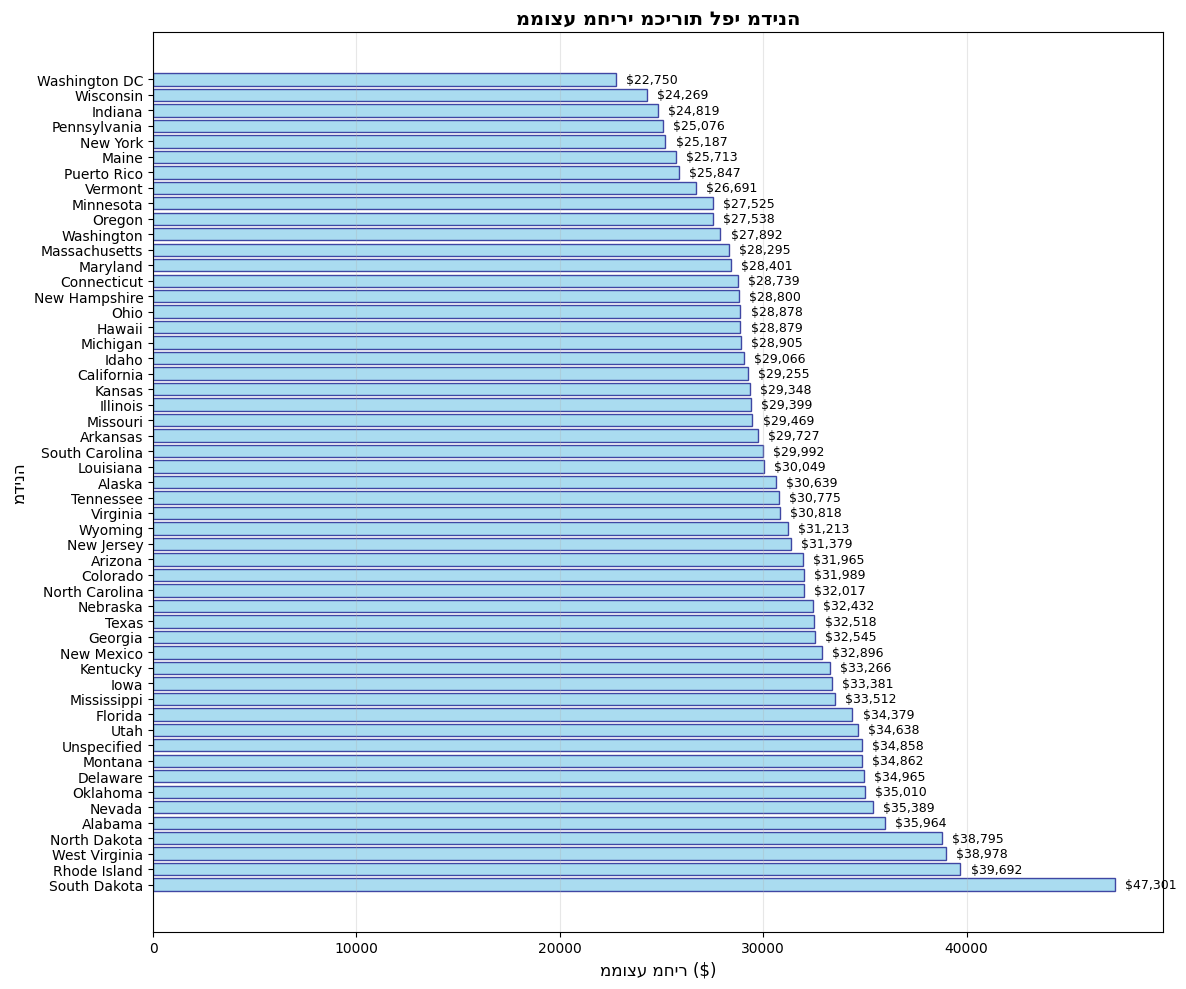

In [32]:
price_summary = df_train_trunc.groupby('state')['SalePrice'].agg(['mean', 'count']).reset_index()
price_summary.columns = ['מדינה', 'ממוצע_מחיר', 'מספר_מכירות']
price_summary['ממוצע_מחיר'] = price_summary['ממוצע_מחיר'].round(0)
price_summary = price_summary.sort_values('ממוצע_מחיר', ascending=False)

plt.figure(figsize=(12, 10))

bars = plt.barh(price_summary['מדינה'], price_summary['ממוצע_מחיר'],
                color='skyblue', edgecolor='navy', alpha=0.7)

plt.xlabel('ממוצע מחיר ($)', fontsize=12)
plt.ylabel('מדינה', fontsize=12)
plt.title('ממוצע מחירי מכירות לפי מדינה', fontsize=14, fontweight='bold')

# הוספת ערכים על העמודות
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}', ha='left', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.show()

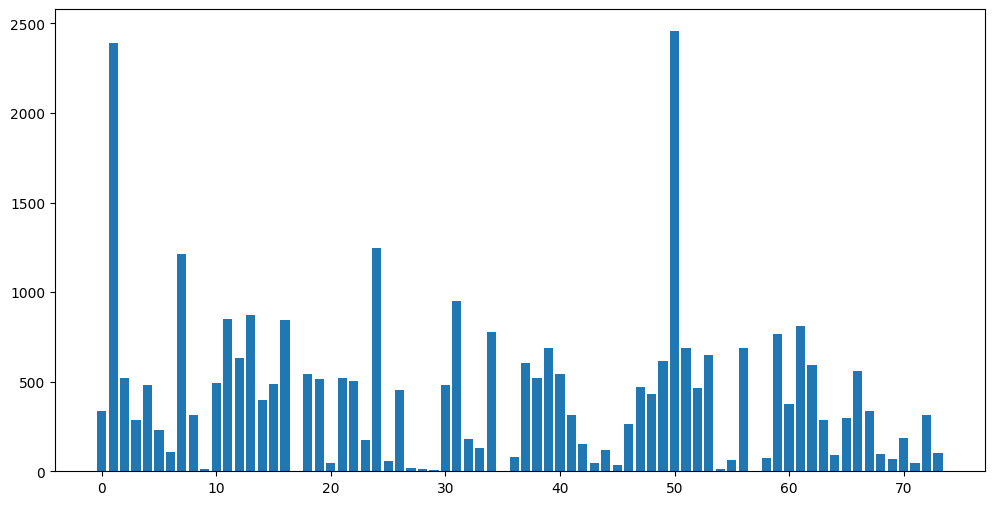

In [22]:
sale_summary = df_train_trunc[df_train_trunc['YearMade'] == 1000].groupby('fiProductClassDesc')['saledate'].count()

plt.figure(figsize=(12, 6))
plt.bar(range(len(sale_summary)), sale_summary.values)
plt.show()





/tmp/ipython-input-431773100.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sale_summary = df_train_trunc[df_train_raw['MachineHoursCurrentMeter'] == 0].groupby('fiProductClassDesc')['saledate'].count()


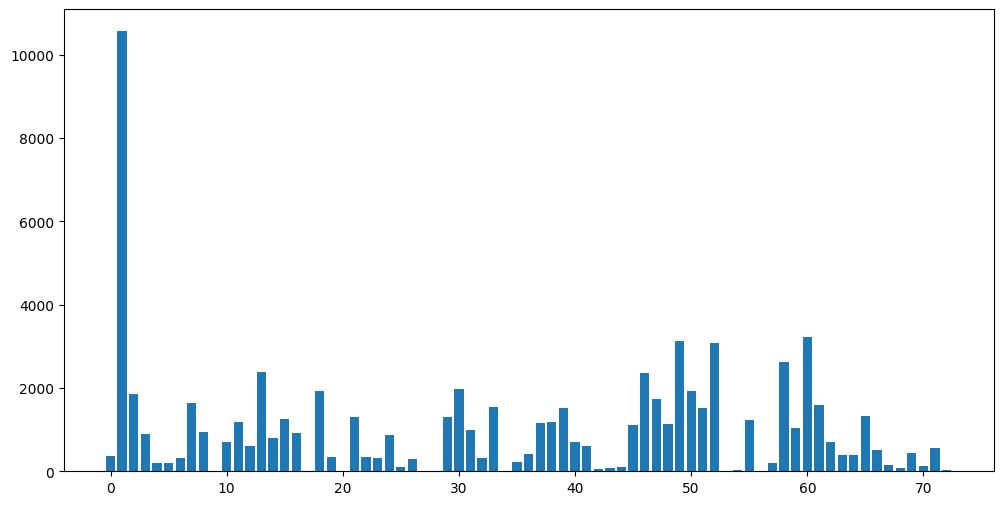

In [23]:
sale_summary = df_train_trunc[df_train_raw['MachineHoursCurrentMeter'] == 0].groupby('fiProductClassDesc')['saledate'].count()

plt.figure(figsize=(12, 6))
plt.bar(range(len(sale_summary)), sale_summary.values)
plt.show()

מקדמי תיקון אינפלציה:
  2000: x1.333
  2001: x1.296
  2002: x1.276
  2003: x1.248
  2004: x1.215
  2005: x1.176
  2006: x1.139
  2007: x1.108
  2008: x1.066
  2009: x1.070
  2010: x1.053
  2011: x1.021
  2012: x1.000


/tmp/ipython-input-3894789326.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_trunc['year'] = df_train_trunc['saledate'].dt.year
/tmp/ipython-input-3894789326.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_trunc['SalePrice_adj'] = df_train_trunc.apply(


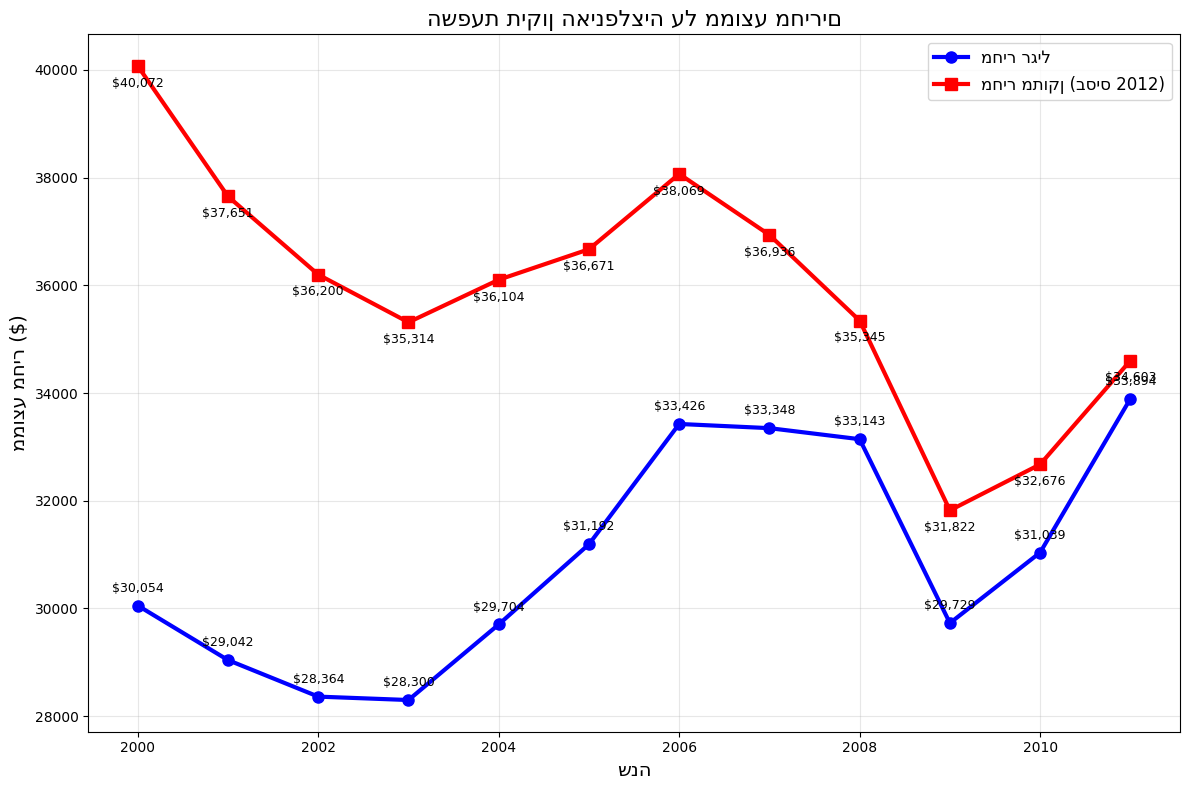


=== השוואת ממוצעים לפי שנה ===
שנה    מחיר רגיל       מחיר מתוקן      הפרש           
------------------------------------------------------------
2000   $30,054         $40,072         $10,018        
2001   $29,042         $37,651         $8,609         
2002   $28,364         $36,200         $7,836         
2003   $28,300         $35,314         $7,014         
2004   $29,704         $36,104         $6,400         
2005   $31,192         $36,671         $5,478         
2006   $33,426         $38,069         $4,643         
2007   $33,348         $36,936         $3,587         
2008   $33,143         $35,345         $2,201         
2009   $29,729         $31,822         $2,093         
2010   $31,039         $32,676         $1,637         
2011   $33,894         $34,603         $708           


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. נתוני CPI (מדד המחירים לצרכן)
cpi_data_real = {
    2000: 172.2, 2001: 177.1, 2002: 179.9, 2003: 184.0, 2004: 188.9, 2005: 195.3,
    2006: 201.6, 2007: 207.3, 2008: 215.3, 2009: 214.5, 2010: 218.1, 2011: 224.9, 2012: 229.6
}

# 2. חישוב מקדמי התיקון (בסיס שנת 2012)
ADJUSTMENT_YEAR = 2012
inflation_multiplier = {year: cpi_data_real[ADJUSTMENT_YEAR] / cpi
                       for year, cpi in cpi_data_real.items()}

print("מקדמי תיקון אינפלציה:")
for year in sorted(inflation_multiplier.keys()):
    print(f"  {year}: x{inflation_multiplier[year]:.3f}")

# 3. יצירת עמודת שנה (אם עדיין לא קיימת)
df_train_trunc['year'] = df_train_trunc['saledate'].dt.year

# 4. חישוב מחיר מתוקן
df_train_trunc['SalePrice_adj'] = df_train_trunc.apply(
    lambda row: row['SalePrice'] * inflation_multiplier.get(row['year'], 1),
    axis=1
)

# 5. חישוב ממוצעים לפי שנה
yearly_avg_original = df_train_trunc.groupby('year')['SalePrice'].mean()
yearly_avg_adjusted = df_train_trunc.groupby('year')['SalePrice_adj'].mean()

# 6. יצירת הגרף
plt.figure(figsize=(12, 8))

plt.plot(yearly_avg_original.index, yearly_avg_original.values,
         marker='o', linewidth=3, markersize=8, label='מחיר רגיל', color='blue')
plt.plot(yearly_avg_adjusted.index, yearly_avg_adjusted.values,
         marker='s', linewidth=3, markersize=8, label='מחיר מתוקן (בסיס 2012)', color='red')

plt.title('השפעת תיקון האינפלציה על ממוצע מחירים', fontsize=16)
plt.xlabel('שנה', fontsize=14)
plt.ylabel('ממוצע מחיר ($)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# הוספת ערכים על הגרף
for year in yearly_avg_original.index:
    plt.annotate(f'${yearly_avg_original[year]:,.0f}',
                (year, yearly_avg_original[year]),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f'${yearly_avg_adjusted[year]:,.0f}',
                (year, yearly_avg_adjusted[year]),
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 7. הדפסת תוצאות
print("\n=== השוואת ממוצעים לפי שנה ===")
print(f"{'שנה':<6} {'מחיר רגיל':<15} {'מחיר מתוקן':<15} {'הפרש':<15}")
print("-" * 60)
for year in sorted(yearly_avg_original.index):
    original = yearly_avg_original[year]
    adjusted = yearly_avg_adjusted[year]
    diff = adjusted - original
    print(f"{year:<6} ${original:<14,.0f} ${adjusted:<14,.0f} ${diff:<14,.0f}")

/tmp/ipython-input-2770017318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_trunc['DaysFromStart'] = (df_train_trunc['saledate'] - min_date).dt.days
/tmp/ipython-input-2770017318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_trunc['month'] = df_train_trunc['saledate'].dt.month


מספר מכירות בעונה המוקדמת: 113,160
מקדם הכיוון של הרגרסיה: $-1.55 ליום
נקודת החיתוך: $40,252


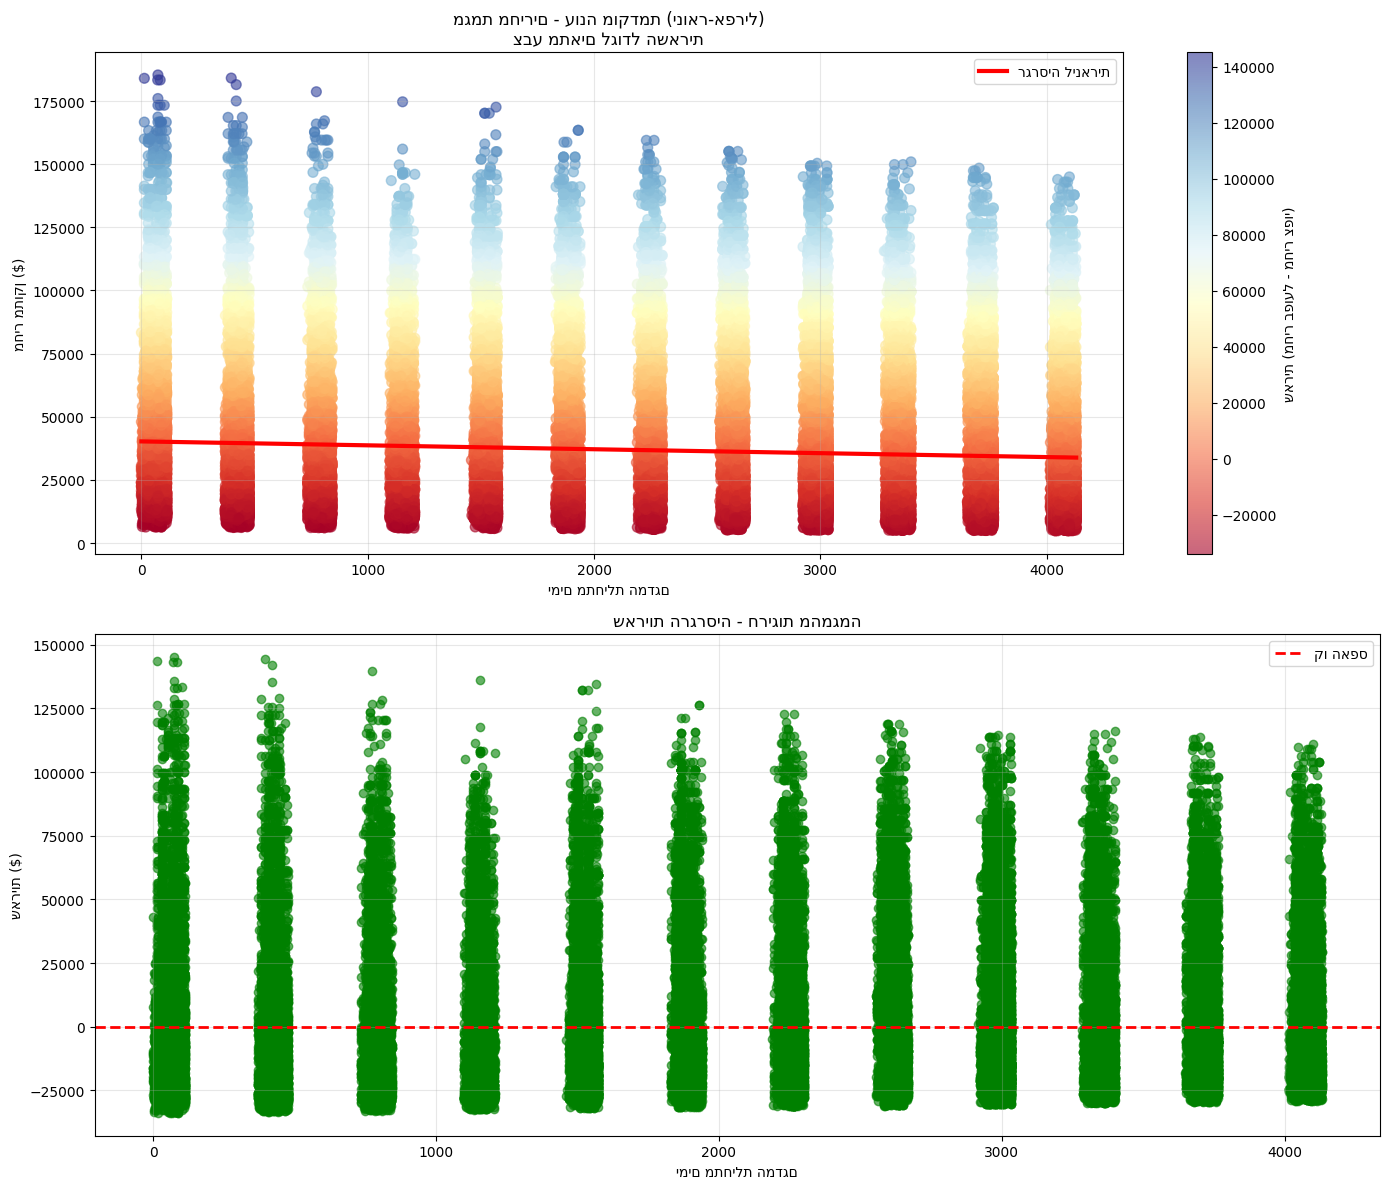


=== ניתוח השאריות ===
ממוצע השאריות: $-0
סטיית תקן של השאריות: $26,809
שארית מינימלית: $-33,889
שארית מקסימלית: $145,195

חריגים גבוהים (>53,618$): 6654
חריגים נמוכים (<-53,618$): 0
אחוז החריגים: 5.9%


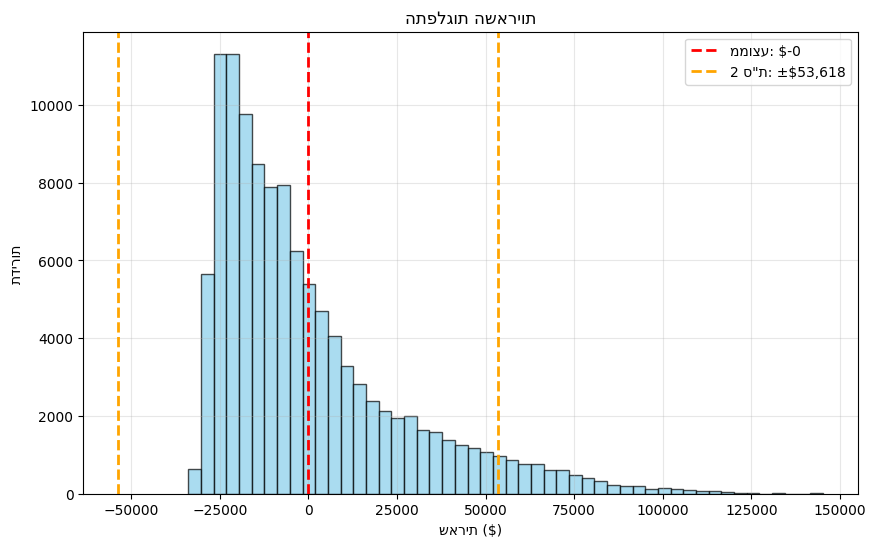

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. הכנת הנתונים (בהנחה שכבר יש לך SalePrice_adj)
# אם עדיין לא חישבת את המחיר המתוקן, הוסיפי את החישוב מהקוד הקודם

# 2. יצירת עמודות זמן
min_date = df_train_trunc['saledate'].min()
df_train_trunc['DaysFromStart'] = (df_train_trunc['saledate'] - min_date).dt.days
df_train_trunc['month'] = df_train_trunc['saledate'].dt.month

# 3. סינון לעונה המוקדמת (ינואר-אפריל)
early_season_df = df_train_trunc[df_train_trunc['month'].isin([1, 2, 3, 4])].copy()

print(f"מספר מכירות בעונה המוקדמת: {len(early_season_df):,}")

# 4. בניית מודל הרגרסיה
X = early_season_df[['DaysFromStart']].values
y = early_season_df['SalePrice_adj'].values

# אימון המודל
trend_model = LinearRegression()
trend_model.fit(X, y)

# חיזוי הערכים
y_pred = trend_model.predict(X)

# חישוב השאריות
residuals = y - y_pred

print(f"מקדם הכיוון של הרגרסיה: ${trend_model.coef_[0]:.2f} ליום")
print(f"נקודת החיתוך: ${trend_model.intercept_:,.0f}")

# 5. יצירת הגרף הראשי - מגמה ונקודות
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# גרף עליון - המגמה והנקודות
scatter = ax1.scatter(early_season_df['DaysFromStart'], early_season_df['SalePrice_adj'],
                     alpha=0.6, c=residuals, cmap='RdYlBu', s=50)

# קו הרגרסיה
x_line = np.linspace(early_season_df['DaysFromStart'].min(),
                     early_season_df['DaysFromStart'].max(), 100)
y_line = trend_model.predict(x_line.reshape(-1, 1))
ax1.plot(x_line, y_line, 'red', linewidth=3, label=f'רגרסיה לינארית')

ax1.set_xlabel('ימים מתחילת המדגם')
ax1.set_ylabel('מחיר מתוקן ($)')
ax1.set_title('מגמת מחירים - עונה מוקדמת (ינואר-אפריל)\nצבע מתאים לגודל השארית')
ax1.legend()
ax1.grid(True, alpha=0.3)

# הוספת colorbar
plt.colorbar(scatter, ax=ax1, label='שארית (מחיר בפועל - מחיר צפוי)')

# 6. גרף תחתון - התפלגות השאריות
ax2.scatter(early_season_df['DaysFromStart'], residuals, alpha=0.6, color='green')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='קו האפס')
ax2.set_xlabel('ימים מתחילת המדגם')
ax2.set_ylabel('שאריות ($)')
ax2.set_title('שאריות הרגרסיה - חריגות מהמגמה')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. ניתוח השאריות
print("\n=== ניתוח השאריות ===")
print(f"ממוצע השאריות: ${residuals.mean():,.0f}")
print(f"סטיית תקן של השאריות: ${residuals.std():,.0f}")
print(f"שארית מינימלית: ${residuals.min():,.0f}")
print(f"שארית מקסימלית: ${residuals.max():,.0f}")

# 8. זיהוי חריגים (מעבר ל-2 סטיות תקן)
threshold = 2 * residuals.std()
outliers_high = residuals > threshold
outliers_low = residuals < -threshold

print(f"\nחריגים גבוהים (>{threshold:,.0f}$): {outliers_high.sum()}")
print(f"חריגים נמוכים (<{-threshold:,.0f}$): {outliers_low.sum()}")
print(f"אחוז החריגים: {(outliers_high.sum() + outliers_low.sum()) / len(residuals) * 100:.1f}%")

# 9. גרף נוסף - היסטוגרמה של השאריות
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'ממוצע: ${residuals.mean():,.0f}')
plt.axvline(threshold, color='orange', linestyle='--', linewidth=2, label=f'2 ס"ת: ±${threshold:,.0f}')
plt.axvline(-threshold, color='orange', linestyle='--', linewidth=2)
plt.xlabel('שארית ($)')
plt.ylabel('תדירות')
plt.title('התפלגות השאריות')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
# --- שלב 0: ייבוא כל הספריות הנדרשות ---
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from google.colab import drive

# --- שלב 1: הגדרות וטעינת נתונים ---
print("--- שלב 1: טוען נתונים ---")
drive.mount('/content/drive', force_remount=True)
DRIVE_PATH = '/content/drive/MyDrive/KaggleProject/'

try:
    df_train_raw = pd.read_csv(f'{DRIVE_PATH}Train.csv', low_memory=False, parse_dates=['saledate'])
    df_valid_raw = pd.read_csv(f'{DRIVE_PATH}Valid.csv', low_memory=False, parse_dates=['saledate'])
    print("נתונים נטענו בהצלחה.")
except FileNotFoundError:
    print(f"שגיאה: ודא שהקבצים 'Train.csv' ו-'Valid.csv' נמצאים בתיקייה: {DRIVE_PATH}")
    exit()

# --- שלב 2: עיבוד נתונים והנדסת מאפיינים ---
print("\n--- שלב 2: מבצע עיבוד נתונים והנדסת מאפיינים ---")

# 2.1 סינון, אינפלציה ומאפייני זמן
print("שלב 2.1: סינון, אינפלציה ומאפייני זמן...")
df_train_raw = df_train_raw[df_train_raw['saledate'].dt.year >= 2000].copy()
df_valid_raw = df_valid_raw[df_valid_raw['saledate'].dt.year >= 2000].copy()

cpi_data_real = {
    2000: 172.2, 2001: 177.1, 2002: 179.9, 2003: 184.0, 2004: 188.9, 2005: 195.3,
    2006: 201.6, 2007: 207.3, 2008: 215.3, 2009: 214.5, 2010: 218.1, 2011: 224.9, 2012: 229.6
}
ADJUSTMENT_YEAR = 2012
inflation_multiplier = {year: cpi_data_real[ADJUSTMENT_YEAR] / cpi for year, cpi in cpi_data_real.items()}
df_train_raw['SalePrice_adj'] = df_train_raw.apply(lambda row: row['SalePrice'] * inflation_multiplier.get(row['saledate'].year, 1), axis=1)
train_original_prices = df_train_raw[['SalePrice', 'SalePrice_adj']].copy()

df_train_raw['source'] = 'train'
df_valid_raw['source'] = 'valid'
df_combined_temp = pd.concat([df_train_raw.drop(['SalePrice', 'SalePrice_adj'], axis=1), df_valid_raw], ignore_index=True)

min_date = df_combined_temp['saledate'].min()
for df in [df_combined_temp]:
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['DayOfYear'] = df['saledate'].dt.dayofyear
    df['DaysFromStart'] = (df['saledate'] - min_date).dt.days

df_train_raw = df_combined_temp[df_combined_temp['source'] == 'train'].drop('source', axis=1).copy()
df_valid_raw = df_combined_temp[df_combined_temp['source'] == 'valid'].drop('source', axis=1).copy()
df_train_raw = pd.concat([df_train_raw.reset_index(drop=True), train_original_prices.reset_index(drop=True)], axis=1)

# 2.2 חישוב מגמה ושאריות עם שני מודלים עונתיים
print("שלב 2.2: חישוב מגמה ושאריות עם שני מודלים עונתיים...")
early_season_train_df = df_train_raw[df_train_raw['saleMonth'].isin([1, 2, 3, 4])].copy()
rest_of_year_train_df = df_train_raw[~df_train_raw['saleMonth'].isin([1, 2, 3, 4])].copy()

trend_model_early = LinearRegression()
trend_model_early.fit(early_season_train_df[['DaysFromStart']], early_season_train_df['SalePrice_adj'])
trend_model_rest = LinearRegression()
trend_model_rest.fit(rest_of_year_train_df[['DaysFromStart']], rest_of_year_train_df['SalePrice_adj'])

def predict_seasonal_trend(df):
    early_mask = df['saleMonth'].isin([1, 2, 3, 4])
    predictions = pd.Series(index=df.index, dtype=float)
    if early_mask.sum() > 0:
        predictions.loc[early_mask] = trend_model_early.predict(df.loc[early_mask, ['DaysFromStart']])
    if (~early_mask).sum() > 0:
        predictions.loc[~early_mask] = trend_model_rest.predict(df.loc[~early_mask, ['DaysFromStart']])
    return predictions

df_train_raw['SalePrice_Trend'] = predict_seasonal_trend(df_train_raw)
df_valid_raw['SalePrice_Trend'] = predict_seasonal_trend(df_valid_raw)
df_train_raw['SalePrice_Residual'] = df_train_raw['SalePrice_adj'] - df_train_raw['SalePrice_Trend']

# 2.3 איחוד לעיבוד סופי
train_labels_residual = df_train_raw['SalePrice_Residual'].copy()
df_train_proc = df_train_raw.drop(['SalePrice', 'SalePrice_adj', 'SalePrice_Trend', 'SalePrice_Residual', 'saledate', 'SalesID', 'MachineID'], axis=1)
df_train_proc['source'] = 'train'
df_valid_proc = df_valid_raw.drop(['SalePrice_Trend', 'saledate', 'SalesID', 'MachineID'], axis=1)
df_valid_proc['source'] = 'valid'
df_combined = pd.concat([df_train_proc, df_valid_proc], ignore_index=True, sort=False)

# --- שלב 2.4: הנדסת מאפיינים ועיבוד נתונים מאוחד (החלק המעודכן) ---
print("שלב 2.4: הנדסת מאפיינים ועיבוד נתונים...")

# --- הוספת מאפיין is_YearMade_1000 לפני התיקון ---
df_combined['is_YearMade_1000'] = (df_combined['YearMade'] == 1000).astype(int)

# תיקון חכם ל-YearMade (הקוד המקורי שלך)
year_made_by_model = df_combined.groupby('fiModelDesc')['YearMade'].median().astype(int)
rows_to_fix_idx = df_combined[df_combined['YearMade'] == 1000].index
imputed_years = df_combined.loc[rows_to_fix_idx, 'fiModelDesc'].map(year_made_by_model)
global_median_year = df_combined.loc[df_combined['YearMade'] != 1000, 'YearMade'].median()
imputed_years = imputed_years.fillna(global_median_year)
df_combined.loc[rows_to_fix_idx, 'YearMade'] = imputed_years.values
df_combined['machineAge'] = df_combined['saleYear'] - df_combined['YearMade']

# תיקון חכם ל-MachineHoursCurrentMeter
df_combined['MachineHoursCurrentMeter_is_missing'] = df_combined['MachineHoursCurrentMeter'].isnull() | (df_combined['MachineHoursCurrentMeter'] == 0)
df_combined['MachineHoursCurrentMeter'].replace(0, np.nan, inplace=True)
imputed_hours = df_combined.groupby('fiModelDesc')['MachineHoursCurrentMeter'].transform(lambda x: x.fillna(x.median()))
df_combined['MachineHoursCurrentMeter'] = imputed_hours
if df_combined['MachineHoursCurrentMeter'].isnull().sum() > 0:
    df_combined['MachineHoursCurrentMeter'].fillna(df_combined['MachineHoursCurrentMeter'].median(), inplace=True)

# טיפול ב-auctioneerID
if df_combined['auctioneerID'].isnull().sum() > 0:
    df_combined['auctioneerID_is_missing'] = df_combined['auctioneerID'].isnull()
    df_combined['auctioneerID'] = df_combined['auctioneerID'].fillna(df_combined['auctioneerID'].median())

# --- הוספת מאפייני Ripper ו-Enclosure (הגישה הפשוטה והיציבה) ---
print("שלב 2.4.1: הנדסת מאפיינים עבור Ripper ו-Enclosure...")
df_combined['Ripper_is_missing'] = df_combined['Ripper'].isnull().astype(int)
ripper_types = ['Yes', 'Multi Shank', 'Single Shank']
df_combined['has_Ripper'] = df_combined['Ripper'].isin(ripper_types).astype(int)
enclosure_mode = df_combined['Enclosure'].mode()[0]
df_combined['Enclosure_Type'] = df_combined['Enclosure'].fillna(enclosure_mode).astype('category').cat.codes
df_combined.drop(['Ripper', 'Enclosure'], axis=1, inplace=True)

# --- הוספת מאפיינים נוספים מבוססי כללים ---
print("שלב 2.4.2: הנדסת מאפיינים נוספת מבוססת כללים...")
df_combined['fiProductClassDesc'] = df_combined['fiProductClassDesc'].fillna('')
keywords_to_extract = ['excavator', 'dozer', 'loader', 'crawler', 'wheel', 'track']
for keyword in keywords_to_extract:
    df_combined[f'is_{keyword}'] = df_combined['fiProductClassDesc'].str.contains(keyword, case=False).astype(int)
df_combined['is_Hours_Zero'] = (df_combined['MachineHoursCurrentMeter'] == 0).astype(int)
df_combined['is_ProductGroup_5'] = (df_combined['ProductGroup'] == 5).astype(int)
df_combined['is_ProductGroup_2'] = (df_combined['ProductGroup'] == 2).astype(int)

# המרת שאר עמודות הטקסט לקודים מספריים
source_col = df_combined['source']
df_combined = df_combined.drop('source', axis=1)
for col_name in df_combined.columns:
    if pd.api.types.is_object_dtype(df_combined[col_name]):
        df_combined[col_name] = df_combined[col_name].fillna('missing').astype('category').cat.codes
df_combined['source'] = source_col



# --- שלב 3: הערכת ביצועים על סט וולידציה עונתי ---
print("\n" + "="*50)
print("--- שלב 3: הערכת ביצועים על סט וולידציה עונתי (ינואר-אפריל 2011) ---")

# 3.1 הכנת הנתונים לפיצול
df_train_processed = df_combined[df_combined['source'] == 'train'].drop('source', axis=1).copy()
df_train_processed['SalePrice_Residual'] = train_labels_residual.values
df_train_processed['SalePrice_adj'] = df_train_raw['SalePrice_adj'].values
df_train_processed['saledate'] = df_train_raw['saledate']

# 3.2 פיצול עונתי
train_time_split = df_train_processed[df_train_processed['saledate'] < '2011-01-01'].copy()
validation_mask = (df_train_processed['saledate'] >= '2011-01-01') & (df_train_processed['saledate'] < '2011-05-01')
val_time_split = df_train_processed[validation_mask].copy()

X_train_time = train_time_split.drop(['SalePrice_Residual', 'SalePrice_adj', 'saledate'], axis=1)
y_train_time_residual = train_time_split['SalePrice_Residual']
X_val_time = val_time_split.drop(['SalePrice_Residual', 'SalePrice_adj', 'saledate'], axis=1)
y_val_actual_price = val_time_split['SalePrice_adj']
val_time_trend = df_train_raw.loc[val_time_split.index, 'SalePrice_Trend'].values

# 3.3 הוספת מאפיין Target Encoding מבוסס מיקום
print("יוצר מאפיין Target Encoding עבור 'state'...")
median_price_by_state = train_time_split.groupby('state')['SalePrice_adj'].median()
X_train_time['State_Median_Price'] = X_train_time['state'].map(median_price_by_state)
X_val_time['State_Median_Price'] = X_val_time['state'].map(median_price_by_state)
global_median_price = train_time_split['SalePrice_adj'].median()
X_train_time['State_Median_Price'].fillna(global_median_price, inplace=True)
X_val_time['State_Median_Price'].fillna(global_median_price, inplace=True)

fimodel_median_price = train_time_split.groupby('fiModelDesc')['SalePrice_adj'].median()
auctioneer_median_price = train_time_split.groupby('auctioneerID')['SalePrice_adj'].median()

X_train_time['fiModelDesc_target_encoded'] = X_train_time['fiModelDesc'].map(fimodel_median_price).fillna(global_median_price)
X_train_time['auctioneerID_target_encoded'] = X_train_time['auctioneerID'].map(auctioneer_median_price).fillna(global_median_price)

X_val_time['fiModelDesc_target_encoded'] = X_val_time['fiModelDesc'].map(fimodel_median_price).fillna(global_median_price)
X_val_time['auctioneerID_target_encoded'] = X_val_time['auctioneerID'].map(auctioneer_median_price).fillna(global_median_price)

X_val_time = X_val_time[X_train_time.columns]

# 3.4 אימון מודל וולידציה
print("\nמאמן מודל וולידציה (על נתוני 2000-2010)...")

user_params = {
    'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 4,
    'min_samples_leaf': 1, 'max_features': 'sqrt', 'n_jobs': -1, 'random_state': 42
}

validation_model = RandomForestRegressor(**user_params)
validation_model.fit(X_train_time, y_train_time_residual)

# 3.5 חיזוי וחישוב ציוני טעות
initial_val_preds_residual = validation_model.predict(X_val_time)
initial_val_preds_full_price = val_time_trend + initial_val_preds_residual

def rmse(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))
def rmsle(y_true, y_pred): return np.sqrt(mean_squared_log_error(y_true, np.maximum(y_pred, 1)))

final_val_rmse = rmse(y_val_actual_price, initial_val_preds_full_price)
final_val_rmsle = rmsle(y_val_actual_price, initial_val_preds_full_price)

print("\n--- ביצועי המודל על סט הוולידציה העונתי ---")
print(f"סט וולידציה (Validation Set - ינואר-אפריל 2011):")
print(f"\tRMSE:  ${final_val_rmse:,.2f}")
print(f"\tRMSLE: {final_val_rmsle:.4f}\n")

# --- שלב 4: אימון מודל סופי עם הפרמטרים ---
print("\n" + "="*50)
print("--- שלב 4: מאמן מודל סופי עם הפרמטרים ---")

# 4.1 הכנת הנתונים הסופיים לאימון
X_full_train = df_train_processed.drop(['SalePrice_Residual', 'SalePrice_adj', 'saledate'], axis=1)
y_full_train_residual = df_train_processed['SalePrice_Residual']
df_valid_processed = df_combined[df_combined['source'] == 'valid'].drop('source', axis=1).copy()

# 4.2 הוספת מאפיין Target Encoding לכל סט האימון ולסט המבחן
print("מוסיף מאפיין Target Encoding לנתונים המלאים...")

# הוספת target encoding לסט האימון
X_full_train['State_Median_Price'] = X_full_train['state'].map(median_price_by_state)
X_full_train['State_Median_Price'].fillna(global_median_price, inplace=True)

X_full_train['fiModelDesc_target_encoded'] = X_full_train['fiModelDesc'].map(fimodel_median_price).fillna(global_median_price)
X_full_train['auctioneerID_target_encoded'] = X_full_train['auctioneerID'].map(auctioneer_median_price).fillna(global_median_price)

# הוספת target encoding לסט הוולידציה
df_valid_processed['State_Median_Price'] = df_valid_processed['state'].map(median_price_by_state)
df_valid_processed['State_Median_Price'].fillna(global_median_price, inplace=True)

df_valid_processed['fiModelDesc_target_encoded'] = df_valid_processed['fiModelDesc'].map(fimodel_median_price).fillna(global_median_price)
df_valid_processed['auctioneerID_target_encoded'] = df_valid_processed['auctioneerID'].map(auctioneer_median_price).fillna(global_median_price)

# בדיקת עמודות חסרות
missing_cols = set(X_full_train.columns) - set(df_valid_processed.columns)
if missing_cols:
    print(f"עמודות חסרות ב-validation: {missing_cols}")

# יצירת alignment לאחר הוספת כל הפיצ'רים
df_valid_processed_aligned = df_valid_processed[X_full_train.columns]

# 4.3 אימון המודל הסופי
final_model = RandomForestRegressor(**user_params)
final_model.fit(X_full_train, y_full_train_residual)
print("אימון המודל הסופי הושלם!")

# --- שלב 5: יצירת קובץ הגשה סופי ---
print("\n--- שלב 5: יוצר קובץ הגשה סופי ---")

final_residuals_pred = final_model.predict(df_valid_processed_aligned)
final_trend_values = df_valid_raw['SalePrice_Trend'].values
final_price_pred = final_trend_values + final_residuals_pred
final_price_pred_floored = np.maximum(final_price_pred, 1000)

df_submission = pd.DataFrame({'SalesID': df_valid_raw['SalesID'], 'SalePrice': final_price_pred_floored})
submission_filename = f'{DRIVE_PATH}submission_Final_Winning_Model_v5.csv'
df_submission.to_csv(submission_filename, index=False)

print(f"\nקובץ ההגשה '{submission_filename}' נשמר בהצלחה!")
print("5 השורות הראשונות בקובץ ההגשה:")
print(df_submission.head())

--- שלב 1: טוען נתונים ---
Mounted at /content/drive
נתונים נטענו בהצלחה.

--- שלב 2: מבצע עיבוד נתונים והנדסת מאפיינים ---
שלב 2.1: סינון, אינפלציה ומאפייני זמן...
שלב 2.2: חישוב מגמה ושאריות עם שני מודלים עונתיים...
שלב 2.4: הנדסת מאפיינים ועיבוד נתונים...


/tmp/ipython-input-862996507.py:102: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['MachineHoursCurrentMeter'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-862996507.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

שלב 2.4.1: הנדסת מאפיינים עבור Ripper ו-Enclosure...
שלב 2.4.2: הנדסת מאפיינים נוספת מבוססת כללים...

--- שלב 3: הערכת ביצועים על סט וולידציה עונתי (ינואר-אפריל 2011) ---
יוצר מאפיין Target Encoding עבור 'state'...

מאמן מודל וולידציה (על נתוני 2000-2010)...


/tmp/ipython-input-862996507.py:169: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_time['State_Median_Price'].fillna(global_median_price, inplace=True)
/tmp/ipython-input-862996507.py:170: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method


--- ביצועי המודל על סט הוולידציה העונתי ---
סט וולידציה (Validation Set - ינואר-אפריל 2011):
	RMSE:  $8,647.73
	RMSLE: 0.2206


--- שלב 4: מאמן מודל סופי עם הפרמטרים ---
מוסיף מאפיין Target Encoding לנתונים המלאים...


/tmp/ipython-input-862996507.py:223: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_full_train['State_Median_Price'].fillna(global_median_price, inplace=True)
/tmp/ipython-input-862996507.py:230: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

אימון המודל הסופי הושלם!

--- שלב 5: יוצר קובץ הגשה סופי ---

קובץ ההגשה '/content/drive/MyDrive/KaggleProject/submission_Final_Winning_Model_v5.csv' נשמר בהצלחה!
5 השורות הראשונות בקובץ ההגשה:
        SalesID     SalePrice
313947  1222837  57841.935364
313948  1222839  78359.854955
313949  1222841  33120.700950
313950  1222843  16708.255927
313951  1222845  40800.702468


In [31]:
# --- שלב 3.6: חישוב Permutation Importance ---
print("\n" + "-"*20 + " שלב 3.6: מחשב Permutation Importance " + "-"*20)
print("בודק אילו פיצ'רים הכי משפיעים על ביצועי המודל על סט הוולידציה...")

from sklearn.inspection import permutation_importance

# הרצת החישוב על מודל הוולידציה וסט הוולידציה

result = permutation_importance(
    validation_model,
    X_val_time,
    y_val_actual_price,
    n_repeats=10,
    random_state=42,
    n_jobs=1
)

# יצירת DataFrame להצגת התוצאות בצורה נוחה
perm_importance_df = pd.DataFrame({
    'feature': X_val_time.columns,
    'importance_mean': result.importances_mean,
}).sort_values('importance_mean', ascending=False)

print("\n--- Top 20 Features (הכי חשובים) לפי Permutation Importance ---")
print(perm_importance_df.head(20).to_string(index=False))

print("\n--- Bottom 10 Features (הכי פחות חשובים או מזיקים) ---")
print(perm_importance_df.tail(10).to_string(index=False))

# זיהוי פיצ'רים עם חשיבות שלילית (כאלה שכנראה מזיקים למודל)
harmful_features = perm_importance_df[perm_importance_df['importance_mean'] < 0]
if not harmful_features.empty:
    print("\n פיצ'רים עם חשיבות שלילית (מועמדים להסרה):")
    print(harmful_features.to_string(index=False))
else:
    print("\n לא נמצאו פיצ'רים עם חשיבות שלילית מובהקת.")


-------------------- שלב 3.6: מחשב Permutation Importance --------------------
בודק אילו פיצ'רים הכי משפיעים על ביצועי המודל על סט הוולידציה...

--- Top 20 Features (הכי חשובים) לפי Permutation Importance ---
                   feature  importance_mean
fiModelDesc_target_encoded         0.437407
               ProductSize         0.095260
               fiModelDesc         0.050992
               fiBaseModel         0.039620
                  YearMade         0.030780
           fiSecondaryDesc         0.028884
        fiProductClassDesc         0.023597
            Grouser_Tracks         0.023198
           Hydraulics_Flow         0.020779
         fiModelDescriptor         0.017619
            Coupler_System         0.016045
            Enclosure_Type         0.015254
                     Forks         0.012466
                has_Ripper         0.011239
              Drive_System         0.010457
           Blade_Extension         0.009712
               Blade_Width         0.00827